<a href="https://colab.research.google.com/github/Girishhuber/Ml/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
df = pd.read_csv("heart_v2.csv")
df

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


In [27]:
x = df.drop("heart disease",axis=1)
x

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269
...,...,...,...,...
265,52,1,172,199
266,44,1,120,263
267,56,0,140,294
268,57,1,140,192


In [28]:
y = df["heart disease"]
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: heart disease, Length: 270, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split 
train_X, test_X, train_y, test_y = train_test_split(x,y, train_size=0.5, test_size=0.5, random_state=0)
test_X

,age,sex,BP,cholestrol
64,63,1,145,233
135,46,0,142,177
153,64,0,130,303
189,70,1,160,269
253,51,1,110,175
...,...,...,...,...
228,58,0,150,283
104,63,1,130,254
173,68,0,120,211
86,62,1,128,208


In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

In [31]:
from pandas.core.common import random_state
from sklearn.linear_model import LogisticRegression
ml = LogisticRegression(random_state =0)
ml.fit(train_X,train_y)

LogisticRegression(random_state=0)

In [32]:
y_pred = ml.predict( test_X)
print(y_pred )

[1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1
 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1]


Text(0.5, 1.0, 'Actual vs predicted')

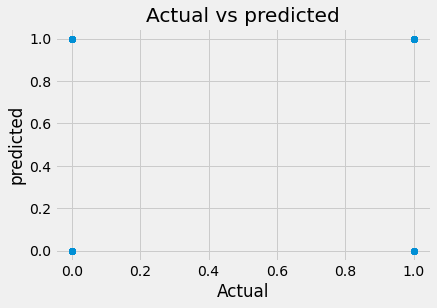

In [33]:
plt.scatter(test_y,y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Actual vs predicted')

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred ,test_y)

0.6370370370370371

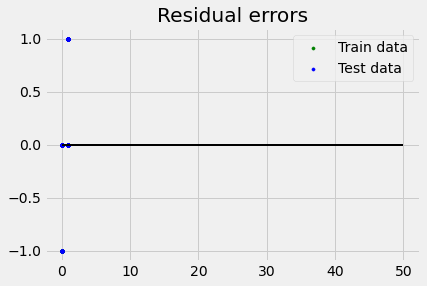

In [35]:
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(ml.predict(train_X), ml.predict(train_X) - train_y,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(ml.predict(test_X), ml.predict(test_X) - test_y,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()